In [2]:
import sys
PATH_opencv = '/usr/local/Cellar/opencv/2.4.13/lib/python2.7/site-packages/'
sys.path.append(PATH_opencv)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [175]:
# image source: https://llambert363.files.wordpress.com/2015/05/book2_kaleidoscope_photo_dotted-wishes-no-7-kaleidoscope-joy-mckenzie.jpg
img = cv2.imread('board.jpg', 0)
print 'number of pixels vertically: ', len(img)
print 'number of pixels horizontally: ', set([len(row) for row in img])
img[:3]

number of pixels vertically:  483
number of pixels horizontally:  set([500])


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

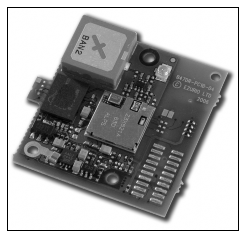

In [176]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# 1. OpenCV - GaussianBlur

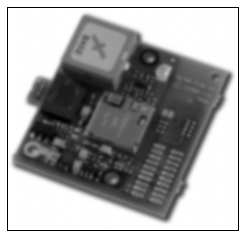

In [177]:
# cv2.GaussianBlur
# http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
result = cv2.GaussianBlur(img,(55,55),3)
plt.imshow(result, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# 2. Self-Implemented Gaussian Blur
### 2D Gaussian Function
$$
G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}}
$$

In [178]:
def gassian_function(x, y, sigma):
    mag = 1 / (2 * np.pi * np.power(sigma, 2))
    exp = -(np.power(x, 2) + np.power(y, 2)) / (2*np.power(sigma, 2))
    g =  mag * np.exp(exp)
    return g

print gassian_function(1,1,1)

0.0585498315243


In [179]:
from datetime import datetime

height, width = img.shape[:2]
target = np.zeros((height,width,3), np.uint8)

sigma = 5
# the area is a square each side 20 pixels
r = 20

print datetime.now()

for y_src, row_src in enumerate(img): 
    for x_src, cell_src in enumerate(row_src):
        # (x_src, y_src) -> cell_src
        value_sum = 0
        weight_sum = 0
        
        for y_nei, row_nei in enumerate(img):
            for x_nei, cell_nei in enumerate(row_nei):
                
                # (x_nei, y_nei) -> cell_nei
                delta_x = x_nei - x_src
                delta_y = y_nei - y_src
                
                if abs(delta_x)<=r and abs(delta_y)<=r:
                    weight = gassian_function(delta_x, delta_y, sigma)
                    value_sum = value_sum + cell_nei * weight 
                    weight_sum = weight_sum + weight
  
        result = int(value_sum / weight_sum)
        target[y_src][x_src] = result

print datetime.now()

2016-09-11 18:47:10.874209


KeyboardInterrupt: 

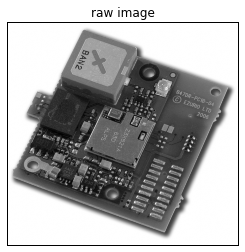

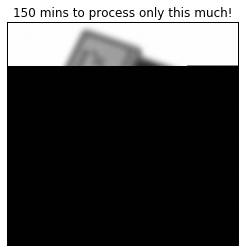

In [183]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("raw image")
plt.show()
    
plt.imshow(target, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("150 mins to process only this much!")
plt.show()

In [184]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()